# Gradiente Descendente o Gradient Descent

## Gradient Descent

En Machine Learning enfrentamos habitualmente el problema de tener que minimizar (o maximizar ) funciones, en nuestro caso generalmente la función de "costo", muchas veces denominada como J.  

Así que antes recordemos algunos elementos que nos serán de interés.   

Recordemos qué indicaba la derivada de una función en un punto y particularmente qué signo tiene la derivada:

### El fundamento de GD y el  signo de la derivada

En el caso de una función derivable, en un punto de mínimo local, la derivada de la función se anula, a la izquierda del mínimo la derivada es negativa (porque la función viene decreciendo) y a la derecha del mismo es positiva porque la función está creciendo (exactamente lo opuesto podría decirse para un punto de máximo local, pero nosotros estamos interesados en los mínimos).

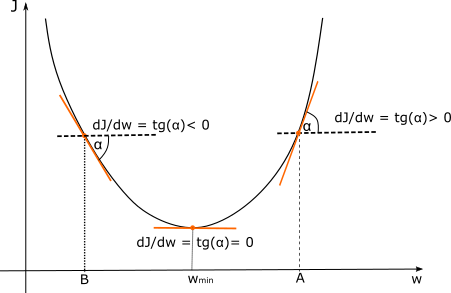


En Análisis Matemático I  y II aprendió métodos **analíticos** para encontrar estos mínimos (o máximos).  

Lamentablemente implementarlos cuando contamos con una gran cantidad de datos hace que el problema sea computacionalmente muy costoso y entonces nos vemos obligados a sacrificar al absoluta precisión de los métodos analíticos y utilizar **"métodos numéricos"**, que nos darán una solución aproximada del valor donde la función alcanza el mínimo.

Supongamos que tenemos una función de Costo J, que fuera función de una sola variable w y de la cual supiéramos que tienen un mínimo, aunque no sabemos en qué valor de w ocurre.  

Imaginemos cómo podría hacer un algoritmo para resolver este problema, no se olvide que partiríamos de una situación donde no conoceríamos el gráfico de la función, digamos que podemos calcular el valor de la función de costo J en cualquier punto, elegimos un valor cualquiera para comenzar, digamos el valor A y calculamos el valor de J(A):

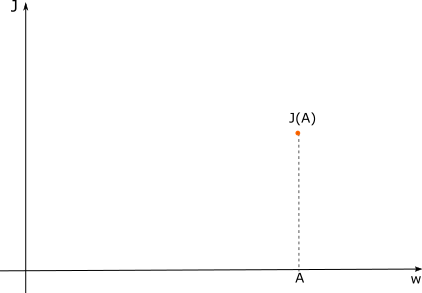

Con esta información no se observa ningún atisbo de dónde estaría el mínimo (local).   
Qué otra información podríamos utilizar para intentar ver "para dónde" queda el mínimo? Algo que tenemos a mano es la derivada. Podríamos calcular la derivada de J en el punto A y ver qué información nos brinda (en los algoritmos reales esta derivada se calcula también en forma numérica y por lo tanto sólo aproximada). 

Supongamos que el valor de la derivada en ese punto A tiene un valor positivo, si bien la derivada es una propiedad "local" de la función, nos da una buena idea de cómo se comporta ésta en las "cercanías" del valor A.  

Como dijimos que la derivada tiene un valor positivo, sabemos que la recta tangente debe ser "ascendente" o lo que es lo mismo, la función está creciendo en dicho punto, como se muestra en la siguiente figura:

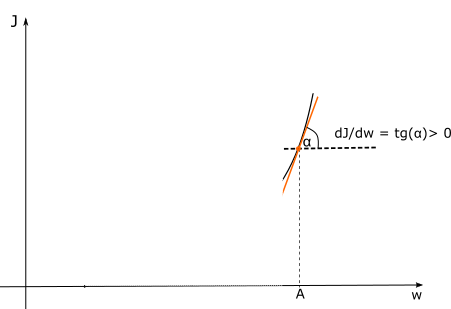

La pregunta es si con esta información podemos deducir si el mínimo de la función se producirá para un valor que se encuentra a la izquierda o a la derecha de A?  

Luego de pensarlo seguramente llegó a la respuesta correcta, el mínimo debería encontrarse a la izquierda de A. Lo cual significa que si deseo acercarme al valor de w donde se produce el mínimo de la función, deberé restarle "algo" a A para corrernos hacia la izquierda.   


Fijese qué pordría haber pasado si comenzábamos en otro punto, por ejemplo el punto B:

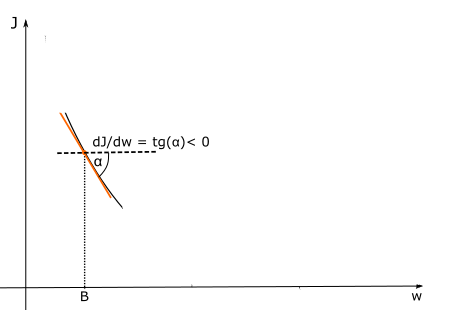

En este caso es justamente al revés, deberíamos movernos hacia la derecha de B, sumándole "algo", y en este caso la derivada es negativa. 

Así que:  

- Si la derivada es positiva, deberíamos corrernos hacia la izquierda y por lo tanto restarle algún valor al punto donde iniciamos.  

- Si la derivada es negativa, deberíamos movernos hacia la derecha y por lo tanto sumarle algún valor al punto donde iniciamos.   

Siempre vamos al revés que el signo de la derivada!  

Es decir que empecemos donde empecemos si queremos acercarnos al valor de w donde se encuentre el mínimo deberíamos hacer algo como esto:  

$$A_1 = A -  \frac {dJ} {dw}(A)$$  

Se suele multiplicar a la derivada por un valor, que se denomina **"Factor de Aprendizaje"** (**"Learning Rate"** ) que se suele denominar $ \alpha $ alfa (no tiene nada que ver con el ángulo que dibujamos anteriormente)

$$A_1 = A - \alpha  \frac {dJ} {dw}(A)$$  


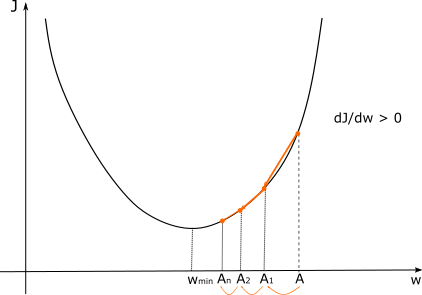

Reiterando el razonamiento anterior, una vez que estuviéramos ubicados en el punto A1, repetiríamos de la siguiente forma:  
$$A_2 = A_1 - \alpha  \frac {dJ} {dw}(A_1)$$  

y en cada paso o iteración de nuestro algoritmo nos iríamos acercando más y más al valor w<sub>min</sub> en el que la función de costo J asume su menor valor.  La fórmula para el algoritmo iterativo de GD sería entonces:  

$$A_n = A_{n-1} - \alpha  \frac {dJ} {dw}(A_{n-1})$$  

En un caso como este se dice que el método de GD, **converge**.

Este proceso es mucho más veloz a la hora de procesar que el procedimiento analítico, pero también tiene sus problemas:  
    
El principal suele ser la elección del valor del **Factor de Aprendizaje** $ \alpha$:  

- Si $ \alpha$ es *muy pequeño* habrá que dar muchos pasos para acercarnos al valor de w<sub>min</sub>
- Si $ \alpha$ es *muy grande* puede ser que nunca hallemos a w<sub>min</sub>:

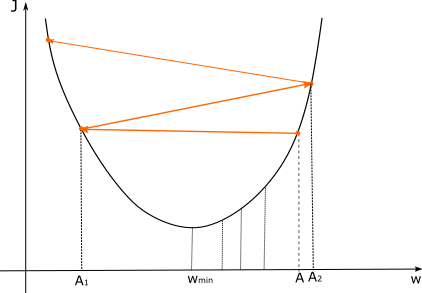

En un caso como este se dice que el método de GD **diverge**

En general tendremos funciones de costo J que dependen de más un variable w, pongamos por caso, 2: en ese caso el gráfico de J se vería como en la siguiente figura:

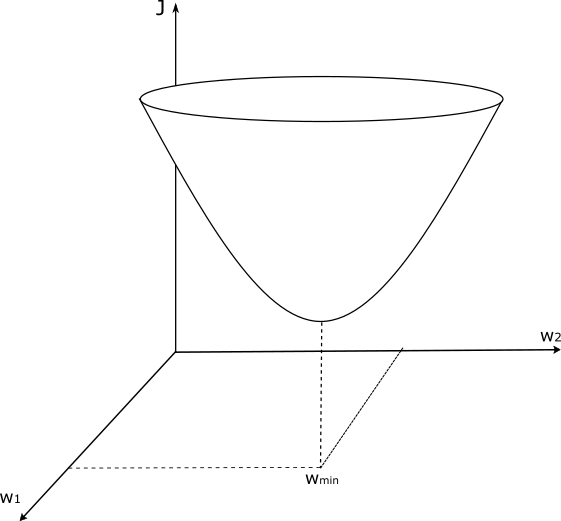

Si ubicamos un plano paralelo al plano w1 w2 que pase a cierta altura del eje J podemos ver que la intersección con la superficie J es una curva. 

Esa curva, cuando se la "proyecta" en el plano de las variables w1 w2,  se denomina "Conjunto de Nivel".

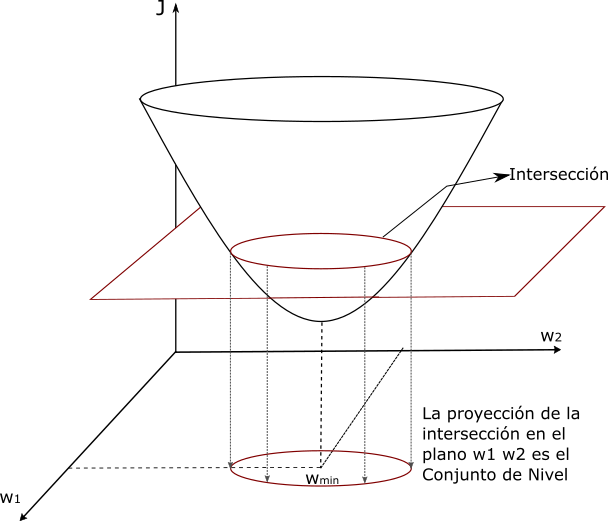

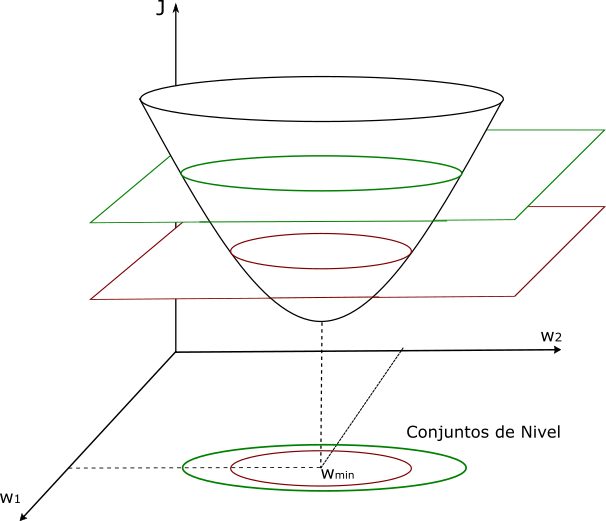

Seguramente en Análisis Matemático II cuando vieron funciones de R<sup>n</sup> --> R utilizaron el vector gradiente, vector que se formaba con las derivadas parciales de la función.  En nuestro caso para la función $ J(w_1,w_2)$ el vector gradiente se calcularía como:  

$$ \nabla J= [\frac{\partial J}{\partial w_1}  \frac{\partial J}{\partial w_2} ] $$  

Ahora bien el vector gradiente tiene una muy interesante propiedad referida a los Conjuntos de Nivel:

> **El vector gradiente en un punto es ortogonal al Conjunto de Nivel en dicho punto y su dirección y sentido indican la dirección de máximo crecimiento de la función en dicho punto.**

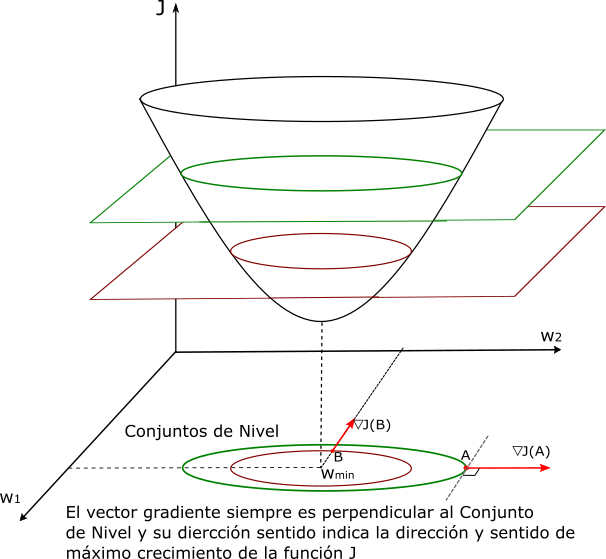

> Como nosotros buscamos un mínimo y el vector gradiente $ \nabla J $ indica la dirección y sentido de **máximo crecimiento** ... deberemos movernos en el sentido exactamente opuesto ... así que nos moveremos en la dirección y sentido de $- \nabla J $ !!

Por lo tanto la fórmula para calcular la ubicación del próximo punto, más cercano al mínimo, tiene una forma idéntica a la anterior, excepto que ahora usamos el vector gradiente en vez de la derivada!:

$$A_1 = A_0 - \alpha  \nabla J(A_0) $$  

Ahora miremos sólo los conjuntos de nivel en plano de las variables w<sub>1</sub> w<sub>2</sub>.   

Elegimos al azar un punto A<sub>0</sub> para comenzar.  Por dicho punto pasa un conjunto de nivel, dibujada en celeste en la siguiente imagen.

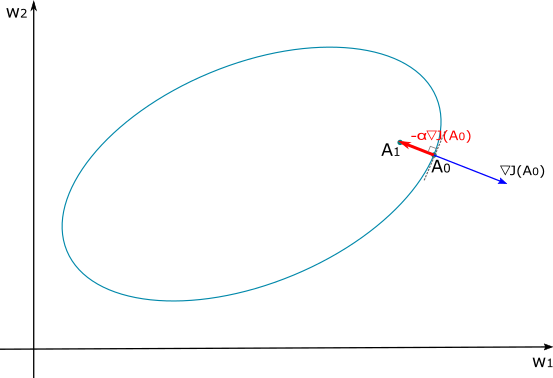

El vector $\nabla J(A_0)$ es ortogonal a dicho conjunto de nivel en el punto  A<sub>0</sub>, dibujado en azul más oscuro en la figura. Este vector gradiente es ortogonal al conjunto de nivel y con su dirección y sentido indica la dirección y sentido de **máximo crecimiento de J** en A<sub>0</sub>.  Como nosotros queremos encontrar el mínimo valor de J, debemos movernos en el sentido contrario al del gradiente, por eso lo restaremos al punto A<sub>0</sub>, como se muestra en la figura en color rojo, donde además ya se lo ha multiplicado por el Factor de Aprendizaje $ \alpha$  
Finalmente obtenemos el punto A<sub>1</sub> que debe estar más cerca al punto donde J alcanza su valor mínimo.

Repitiendo el proceso, pero ahora comenzado en A<sub>1</sub>, veríamos el "camino" que irían siguiendo nuestros puntos hasta finalmente converger en el punto W<sub>min</sub> donde J tiene su menor valor.

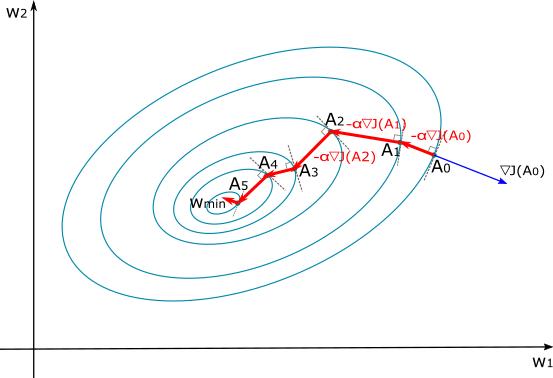

La fórmula para el algoritmo iterativo de GD con cualquier cantidad de variables $ w$ sería entonces:  

$$A_n = A_{n-1} - \alpha  \nabla J(A_{n-1}) $$ 

Por supuesto tenemos que tener la misma consideración que indicamos anteriormente con respecto al valor del Learning Rate $ \alpha$:  

- Si  $ \alpha$ es demasiado pequeño los pasos serán demasiado pequeños y se precisarán muchas iteraciones para acercarnos a W<sub>min</sub>.  

- Si  $ \alpha$ es demasiado grande puede no converger hacia W<sub>min</sub>.

En el caso de Scikit-Learn la implementación incluye diversas opciones para el valor de learning rate:


- un valor de Learning Rate **óptimo** obtenido a través de la fórmula de Bottou, 
- por defecto utiliza un valor denominado **"invscaling"** que suele funcionar **muy bien**, 
- también hay una opción para un valor **adaptativo**, que divide por 5 el valor del learnng rate cada vez que se determina que los valores de J no descienden en cada iteración.
- pero si fuera necesario es posible utilizar un valor **constante** elegido por nosotros, en estos casos sería razonable probar con un valor como 0.001 y  si es necesario probar con varios valores, sugerimos probar con valores como: [0.0001, 0.0001, 0.001,0.01, 0.1, 1] .

Cuándo el método converge? cuándo finalizan las iteraciones?   

A diferencia de los métodos analíticos que nos dan con precisión la ubicación del W<sub>min</sub>, con métodos aproximados como es GD posiblemente nunca alcancemos la ubicación exacta del punto de mínimo, por ende en algún momento deberemos finalizarlo.

Las distintas implementaciones de GD permiten seleccionar diversas opciones para dar por finalizadas las iteraciones:  

- Se carga una cantidad máxima de iteraciones, una vez alcanzada esa cantidad, el programa deja de iterar.
- Se selecciona un valor denominado **tolerancia** $\epsilon$ (epsilon) para la diferencia que debe haber entre el valor de J en una iteración y la siguiente, cuando la diferencia entre dos valores de J es menor que  $\epsilon$, se frenan las iteraciones y se toma el último punto como el mínimo buscado.  
- En otras implmentaciones el valor de la tolerancia se aplica a la **norma o módulo del vector gradiente $\nabla J$**, cuando la norma (la longitud) de éste es menor que la tolerancia elegida, se deja de iterar porque los nuevos puntos del camino se encuetran muy cerca entre sí.  

Generalmente los valores por defecto que traen las implementaciones funcionan bien. 

## Batch Gradient Descent

El método descripto anteriormente se denomina también **Batch GD** donde batch significa que se procesa por lotes, esto a veces puede causar confusión porque en realidad *no procesa por lotes de observaciones* sino que utiliza **todas** las observaciones, pero el nombre se mantiene por cuestiones históricas. En realidad debería llamarse algo así como **Full GD**.

A pesar de a velocidad inherente a GD, utilizar todas las observaciones para luego iterar el algoritmo miles de veces lo obliga a computar millones de operaciones con millones de operandos, que si bien suelen ser sencillas (sumas y multiplicaciones esencialmente) muchas veces se necesitan enormes cantidades de memoria RAM para poder correr el algoritmo en memoria, con la cual a veces no podemos contar.
Veamos por qué:

Supongamos un caso de Regresión Lineal con **m= 1.000.000 de observaciones** y un modelo h(x) que sólo tenga una feature x:

$$ h(x)=w_0 + w_1 x$$

La función de Costo J podría ser la más usada es decir la L2 (Ridge):

$$ J = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} [ h(x_{i}) - y_{i}]²  $$

Al escribir h en la expresión del costo J quedará:

$$ J = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} [w_0 + w_1 x_i - y_{i}]²  $$

Nosotros pretendemos encontrar el valor de $w_0 y w_1$ que minimice el valor de J por lo cual J es una función de $w_0$ y $w_1$

$$ J(w_0,w_1) = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} [w_0 + w_1 x_i - y_{i}]²  $$

La fórmula que debe ser iterada para GD es:

$$A_n = A_{n-1} - \alpha  \nabla J(A_{n-1}) $$ 
    

donde vemos que tenemos que utilizar el gradiente $\nabla J$  

$$ \nabla J= [\frac{\partial J}{\partial w_0}  \frac{\partial J}{\partial w_1} ] $$  

En este caso, para formarnos una idea de la magnitud del problema, podemos calcular manualmente las derivadas parciales para armar el gradiente:

$$ \frac{\partial J}{\partial w_0} = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} 2 [w_0 + w_1 x_i - y_{i}]  $$  

donde se simplifican los valores 2 (por ésto es que se suele incluír el 2 en el denominador de J !!), quedando:

$$ \frac{\partial J}{\partial w_0} = \frac{1}{m}  \displaystyle\sum_{i=1}^{m}  [w_0 + w_1 x_i - y_{i}]  $$  

Ahora necesitamos la derivada parcial de J con respecto a $ w_1$

$$ \frac{\partial J}{\partial w_1} = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} 2 [w_0 + w_1 x_i - y_{i}] x_i $$  

tambié se simplifican los 2 quedando en definitiva:  

$$ \frac{\partial J}{\partial w_1} = \frac{1}{m}  \displaystyle\sum_{i=1}^{m}  [w_0 + w_1 x_i - y_{i}] x_i $$  

En definitiva:  

$$ \nabla J= [\frac{\partial J}{\partial w_0} ,  \frac{\partial J}{\partial w_1} ] = [\frac{1}{m}  \displaystyle\sum_{i=1}^{m}  [w_0 + w_1 x_i - y_{i}]  , \frac{1}{m}  \displaystyle\sum_{i=1}^{m}  [w_0 + w_1 x_i - y_{i}] x_i ]$$   


Observe que si m= 1 millón de observaciones, cada sumatoria tendrá un millón de corchetes y dentro de ellos hay sumas y productos.  

Si al aplicar el algoritmo de GD debemos iterar digamos 1000 veces, debemos multiplicar por mil esas millones de operaciones ... si pretendemos mantener las operaciones en RAM para que se ejecuten velozmente inmediatamente estamos en el rango de los miles de millones de valores, es decir en los GBytes de memoria RAM mínimamente necesarios para computar (sin contar Sistema Operativo, Python, etc ...).  

Y sólo pensamos en un problema con una sola  feature x y una hipótesis h sencilla!

Por suerte ... hay dos soluciones a este problema del GD, y  ambas se encaminan en la misma línea.

## Mini Batch Gradient Descent

Éste sí es realmente un procesamiento por lotes!  

En este caso la estrategia es dividir las observaciones en lotes o grupos de observaciones elegidas al **azar** (ésto es importante), pongamos por caso si el total de observaciones era de m= 1 millón, crear 100 lotes de 10 mil observaciones cada uno.  

- Con el primer lote, llamémoslo $ l_1$  de sólo 10 mil observaciones armamos J, la vamos a llamar $ J_1$.   
$$ J_1(w_0,w_1) = \frac{1}{2l_1}  \displaystyle\sum_{i=1}^{l_1} [w_0 + w_1 x_i - y_{i}]²  $$  


- Esta función $J_1$ tiene sólo 10 mil sumandos en vez del millón que tenía la anterior, digamos que es "100 veces más chica", y por supuesto su gradiente también se ve reducido en la misma escala de 100.   


- A groso modo podemos decir que necesitaríamos una 100 veces menos memoria RAM que antes! Lo cual es muy positivo!  


- Aplicaríamos el mismo algoritmo iterativo de GD, eligiendo un primer punto A<sub>0</sub> donde comenzar **al azar**, y luego saltaríamos, digamos unas mil veces como antes hasta encontrar un mínimo o si no llegamos al mínimo, hasta que se agoten las mil iteraciones permitidas ... Supongamos que llegamos a un mínimo ... ese mínimo **no es el mismo** que hubiéramos obtenido operando con el millón de operaciones!   


- Obviamente la función J con 1 millón de sumandos **no puede ser la misma** que la $J_1$ con 10 mil sumandos y por lo tanto sus mínimos no serían los mismos!  


- Eso es cierto ... pero si las observaciones de los lotes, se obtuvieron **al azar** dentro de todas las observaciones, necesariamente **corresponden al mismo fenómeno** y por lo tanto el mínimo de $J_1$ debe estar bastante próximo al mínimo de J!  


- Entonces utilizamos el punto donde obtuvimos el mínimo de $J_1$ como punto donde iniciar el proceso de GD para el siguiente lote $l_2$!  


- Ahora el punto de inicio del proceso de GD (el que solímos llamar A<sub>0</sub>) para el $l_2$ **no comienza** en cualquier punto al azar, sino que ya comienza cerca de donde posiblemente se encuentre su propio mínimo (también el mínimo de J).   


- Como se encuentra cerca de su propio mínimo, quizá **no sean necesarias las mil iteraciones para llegar al mínimo de $J_2$, así que además de ocupar menos memoria RAM, también converge más rápido!!**.  


- Doble beneficio: menos RAM y más velocidad!!! Esto adquiere trascendencia en los problema de **Big Data** y en los que deben resolverse en **tiempo real**, por ejemplo en algunos pronósticos online.  

- TIP: cuando se usa mini batch GD se sugiere que la cantidad de observaciones de los lotes sea una potencia de 2.

Pero aún hay más ...



### Stochastic Gradient Descent (SGD)

SGD simplemente lleva la idea de mini batch al extremo: se toman lotes ... de **una sola observación** cada uno!  De esta manera se consiguen los máximos beneficios en cuanto a uso de memoria y velocidad.  

- Si bien es cierto que la convergencia de mini batch GD hacia el mínimo es más errática que la de GD y que la de SGD es aún más errática que la de mini batch GD, es posible demostrar matemáticamente que si existe un único mínimo los tres métodos convergen hacia él.  

- Es por esto que SGD suele ser el método de Gradient Descent más utilizado en la actualidad. 

- Nota: las implementaciones suelen incluír aún más mejoras en la aceleración, ya no las tocaremos aquí porque sino el tema se vuelve infinito!

#### SGD en sistemas online

SGD tiene una notable característica muy interesante: como mejora su estimación de la ubicación del minimo incorporando sólo de a una observación es ideal para trabajar online.   

- Imaginemos una situación como esta, referida a un sistema de recomendaciones de un sitio web que funciona en tiempo real en base a datos como el tiempo que el usuario pasa en cada página:  supongamos que tenemos millones de observaciones correspondientes a las interacciones previas de los usuarios, en este momento el sistema ha sido entrenado con SGD con todas ellas e ingresa un usuario e interactúa con el sistema, y finalmente hace algún tipo de selección correspondiente a la variable $y$ a pronosticar, por ejemplo compró algo.   
Ahora tenemos una observación completa con los datos de las features y el resultado $y$, por lo tanto *automáticamente* podemos usar esta nueva observación para entrenar nuestro modelo!  Tendríamos a nuestro modelo actualizado casi al instante!!!



- Si usáramos GD entrenaríamos al sistema con todas las observaciones conocidas y lo usaríamos así durante un período de tiempo, digamos una semana, guardaríamos todas las nuevas interacciones de usuarios de esta semana y digamos al final de la semana juntaríamos **todas** las observaciones, las anteriores más las nuevas, para entrenar nuevamente al sistema, lo cual tardaría bastante y además durante toda la semana no pudimos aprovechar la información que nos darían las interacciones producidas durante la misma.  

Es por esto que SGD se utiliza mucho en sistemas online, por ejemplo en combinación con regresión lineal o regresión logística.

## Yapa

Les dejo esta serie de 3 videos (son de 10' cada uno) que explican muy pedagogicamente como funcionan los modelos de machine learning y Gradient Descent. 

1.   [Modelos para entender una realidad caótica](https://youtu.be/Sb8XVheowVQ)
2.   [Regresión Lineal y Mínimos Cuadrados Ordinarios](https://youtu.be/k964_uNn3l0)
3. [¿Qué es el Descenso del Gradiente? Algoritmo de Inteligencia Artificial](https://youtu.be/A6FiCDoz8_4)



Y acá la web donde se puede jugar con el parámetro alpha y ver el comportamiento: [https://www.benfrederickson.com/numerical-optimization/#gradient-descent](https://www.benfrederickson.com/numerical-optimization/#gradient-descent)